In [10]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n = 5          # index of square grating
a = .8            # period 
d = 0.5*a            # side of square
t = 0.2          # thickness of grating
dpml = 1         # PML thickness
pad = 2          # padding between grating and PML

resolution = 50  # pixels/μm
pol = mp.Ex

In [12]:
from meep.materials import Ag

block = mp.Block(size=mp.Vector3(d,t,d), center=mp.Vector3(), material=Ag)
# block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=mp.Medium(index=n))

In [13]:
fcen = 1
df = 0.8
nfreqs = 50

src = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a,0,a))

In [14]:
cell = mp.Vector3(a, 2*(t/2+pad+dpml), a)

sim = mp.Simulation(cell_size=cell,
                    default_material=mp.Medium(index=1),
                    geometry=[block],
                    sources=[src],
                    resolution=resolution,
                    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a,0,a)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a,0,a)))

     block, center = (0,0,0)
          size (0.4,0.2,0.4)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

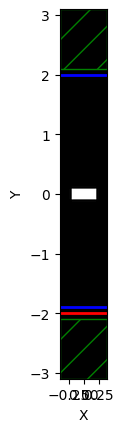

In [15]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))

In [16]:
pt = mp.Vector3(y=t/2+pad) # Point to check field
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, pt, 1e-6))

-----------
Initializing structure...
time for choose_chunkdivision = 8.79765e-05 s
Working in 3D dimensions.
Computational cell is 0.8 x 6.2 x 0.8 with resolution 50
     block, center = (0,0,0)
          size (0.4,0.2,0.4)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 1.66476 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
on time step 38 (time=0.38), 0.106008 s/step
on time step 107 (time=1.07), 0.0581978 s/step
on time step 176 (time=1.76), 0.0584926 s/step
on time step 245 (time=2.45), 0.0583254 s/step
on time step 314 (time=3.14), 0.0582043 s/step
on time step 385 (time=3.85), 0.0570154 s

RuntimeError: meep: simulation fields are NaN or Inf

In [ ]:
p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

In [ ]:
freqs = np.linspace(fcen-df, fcen+df, nfreqs)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2

res_freq = 0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

plt.plot(wl, R, label='R')
plt.plot(wl, T, label='T')
plt.title('Ag grating period %.1f µm resonance at %.2f nm' % (a, res_freq))
plt.xlabel('Wavelength (µm)')
plt.legend()
title = 'square_grating_%.2fum' % res_freq
# plt.savefig('results/'+title+'.png')

In [ ]:
0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

In [ ]:
sim.plot2D(fields=pol, output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))

In [ ]:
sim.plot2D(fields=pol, output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 0, a)))